In [17]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


In [18]:
df = pd.read_csv("merged_adm2_fix.csv")
df = pd.DataFrame(df)
df = df.rename(columns = {'JAXA_GPM_L3_GSMaP_v6_operational_hourlyPrecipRateGC':"perc",
 #'JAXA_GPM_L3_GSMaP_v6_reanalysis_hourlyPrecipRate':'perc_real',
 'MODIS_006_MOD11A1_LST_Day_1km':"ls_temp_day",
 'MODIS_006_MOD11A1_LST_Night_1km' : "ls_temp_night",
 'MODIS_006_MYD13A1_EVI' : "evi",
 'NASA_FLDAS_NOAH01_C_GL_M_V001_Qair_f_tavg': "humid",
 'NASA_FLDAS_NOAH01_C_GL_M_V001_Rainf_f_tavg': "perc_new",
 "NASA_FLDAS_NOAH01_C_GL_M_V001_SoilMoi00_10cm_tavg":"soil_mois",
"NASA_FLDAS_NOAH01_C_GL_M_V001_SoilTemp00_10cm_tavg":"soil_temp",
 'NASA_FLDAS_NOAH01_C_GL_M_V001_Tair_f_tavg': "ns_temp",
 'NASA_FLDAS_NOAH01_C_GL_M_V001_Wind_f_tavg': "wind_speed",
                         'adm_level':'adm_level','date':'date' })

df.head()

adm_level        date      perc  ls_temp_day  ls_temp_night        evi  \
0      Abra  2012-06-01  0.430867   15043.5540      14639.858  4180.8150   
1      Abra  2012-07-01  0.373154   15020.1080      14632.604  3662.6284   
2      Abra  2012-08-01  0.620665   14917.0320      14486.046  3183.5750   
3      Abra  2012-09-01  0.106620   14980.0205      14696.892  4785.5340   
4      Abra  2012-10-01  0.053113   14986.9280      14666.716  4770.0083   

      humid  perc_new  soil_mois  soil_temp    ns_temp  wind_speed  
0  0.016763  0.000172   0.425508  296.31796  297.09457    4.977150  
1  0.016362  0.000186   0.428822  295.84708  296.72488    3.478785  
2  0.016541  0.000245   0.432180  295.66570  296.15265    6.328744  
3  0.015967  0.000099   0.419719  296.26144  296.81122    3.009687  
4  0.014127  0.000039   0.390687  295.36737  295.53925    4.924677

In [19]:
#Visualize missing values - code was found on the Internet
def missing_values_graph(frame, obs, time, var, Yname):
    test = frame[[obs, time, var]]
    test[var].fillna(-1, inplace=True)
    test = test.groupby([obs, time])[var].aggregate('mean').unstack()
    test[test > 0] = 1
    cmap = sns.xkcd_palette(["grey", "blue"])
    plt.figure(figsize=(10, 5))
    ax = sns.heatmap(test, center=0, cmap=cmap, cbar=False,
                     cbar_kws={'ticks': [-1, 0, 1]})
    ax.set(yticklabels=[])
    plt.ylabel(Yname+ " (N=" + str(len(test)) + ")", fontsize=14)
    plt.xlabel("")
    plt.title((var + "\nmissing values (grey), availabe values (blue)"),
              fontsize=14)
    plt.tight_layout()
    plt.show()

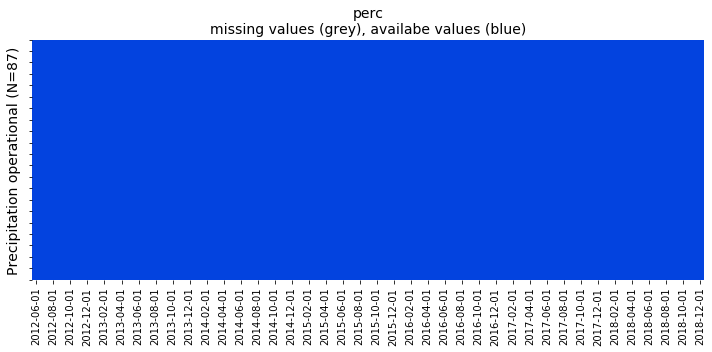

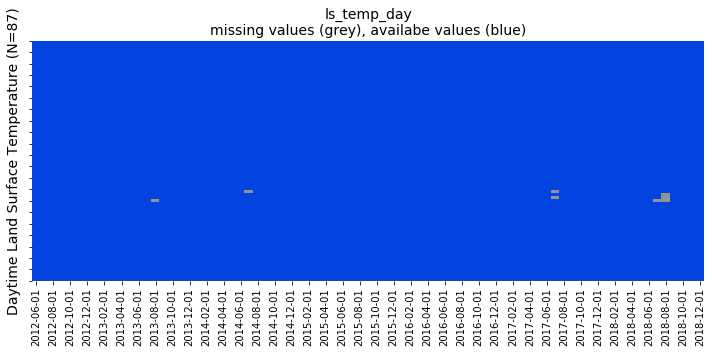

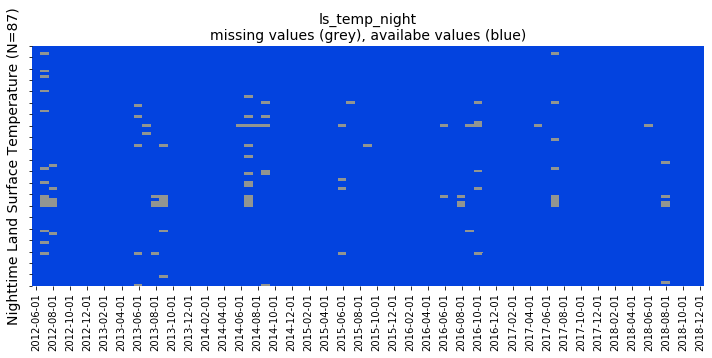

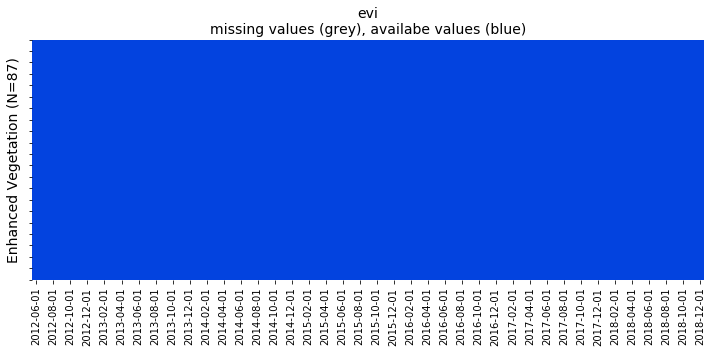

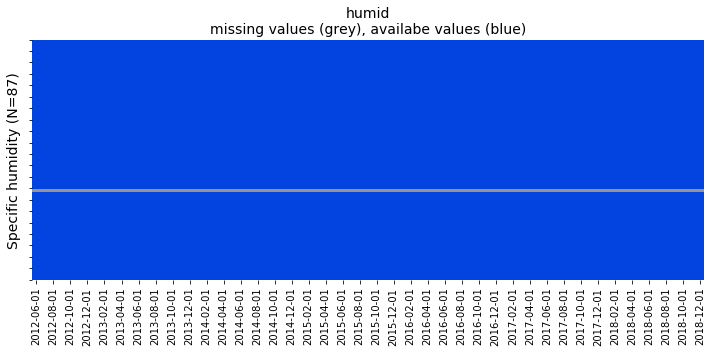

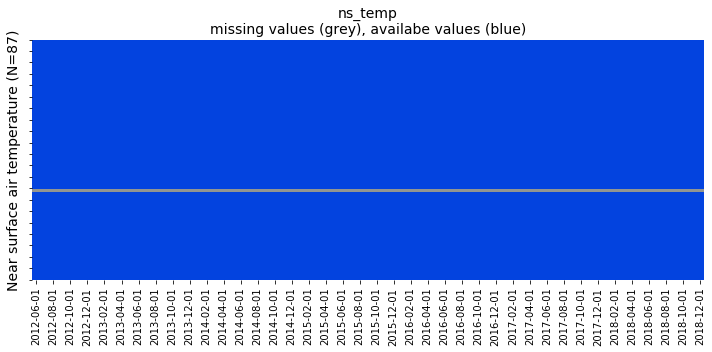

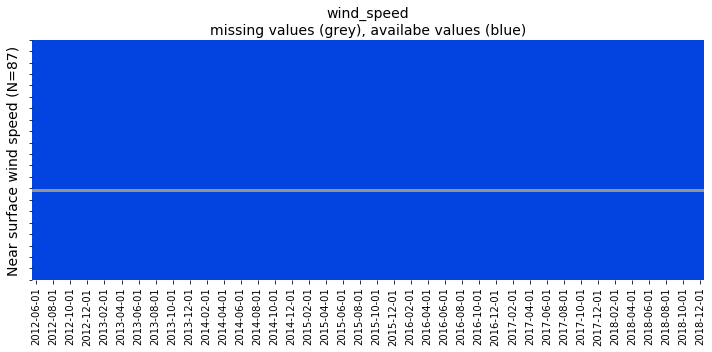

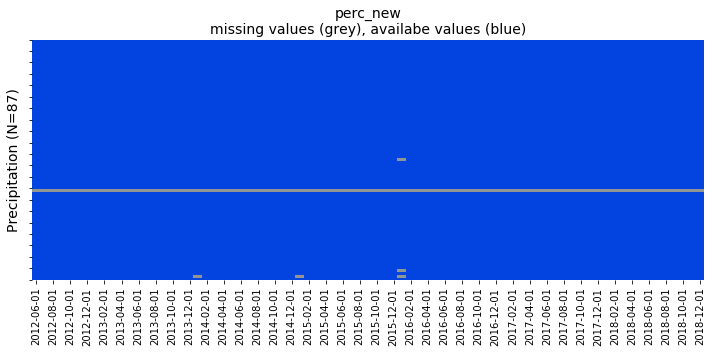

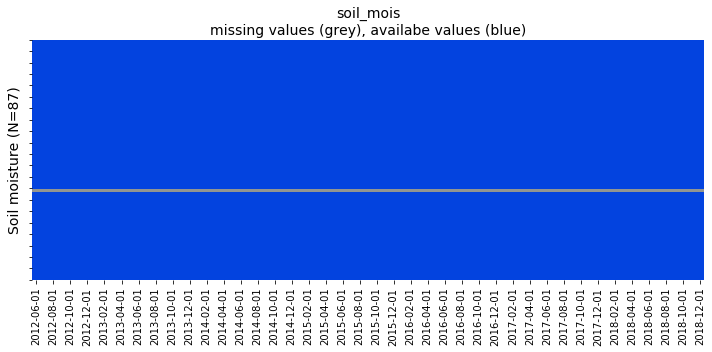

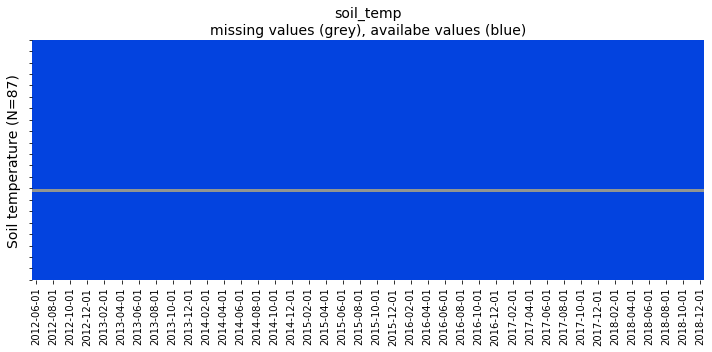

In [20]:
  
missing_values_graph(df, "adm_level", "date", "perc", "Precipitation operational")
#missing from 2012-01-01 until 2014-03-01; missing for "NCR, City of Manila, First District"
missing_values_graph(df, "adm_level", "date", "ls_temp_day", "Daytime Land Surface Temperature")
missing_values_graph(df, "adm_level", "date", "ls_temp_night", "Nighttime Land Surface Temperature")
missing_values_graph(df, "adm_level", "date", "evi", "Enhanced Vegetation")
missing_values_graph(df, "adm_level", "date", "humid", "Specific humidity")
#missing for "NCR, City of Manila, First District"; missing from 2019-11-01 
missing_values_graph(df, "adm_level", "date", "ns_temp", "Near surface air temperature")
#missing for "NCR, City of Manila, First District"; missing from 2019-11-01
missing_values_graph(df, "adm_level", "date", "wind_speed", "Near surface wind speed")
#missing for "NCR, City of Manila, First District"; missing from 2019-11-01

missing_values_graph(df, "adm_level", "date", "perc_new", "Precipitation")
missing_values_graph(df, "adm_level", "date", "soil_mois", "Soil moisture")
missing_values_graph(df, "adm_level", "date", "soil_temp", "Soil temperature")

In [21]:
df.describe()

perc   ls_temp_day  ls_temp_night          evi        humid  \
count  6873.000000   6865.000000    6780.000000  6873.000000  6794.000000   
mean      0.086979  15083.833196   14732.646723  4440.147675     0.016440   
std       0.091355    146.513899      99.953498   839.550436     0.001409   
min       0.000000  14647.812500   13109.000000   594.618840     0.009271   
25%       0.025676  14996.101000   14686.327000  4080.070800     0.015718   
50%       0.061672  15065.449000   14745.820000  4562.127000     0.016677   
75%       0.116049  15134.880000   14795.490000  4969.701000     0.017446   
max       0.885880  15795.163000   15049.094000  6578.051000     0.019830   

           perc_new    soil_mois    soil_temp      ns_temp   wind_speed  
count  6.789000e+03  6794.000000  6794.000000  6794.000000  6794.000000  
mean   8.814848e-05     0.372309   298.244164   298.417811     4.636927  
std    6.713168e-05     0.059160     2.058478     1.846001     1.583416  
min    1.095434e-07     0.153724   289.207000   288.679400     1.787517  
25%    3.872740e-05     0.347887   297.212817   297.567623     3.422727  
50%    7.695034e-05     0.395176   298.266665   298.762160     4.354069  
75%    1.202518e-04     0.414963   299.186415   299.638588     5.661308  
max    6.109239e-04     0.440366   306.511900   303.114500    12.215397

In [22]:
#Zero Kelvin values as NaN
df["ls_temp_day"] = df["ls_temp_day"].replace(0, np.nan)
df["ls_temp_night"] = df["ls_temp_night"].replace(0, np.nan)
df["ns_temp"] = df["ns_temp"].replace(0, np.nan)

#Transform the temperature to Celsius
df["ls_temp_day"] = df[["ls_temp_day"]].transform(lambda x: x*0.02-273.15)
df["ls_temp_night"] = df[["ls_temp_night"]].transform(lambda x: x*0.02-273.15)
df["ns_temp"] = df[["ns_temp"]].transform(lambda x: x-273.15)

#Night temperature below zero as NaN
df["ls_temp_night"] = df["ls_temp_night"].mask(df["ls_temp_night"] < 15)

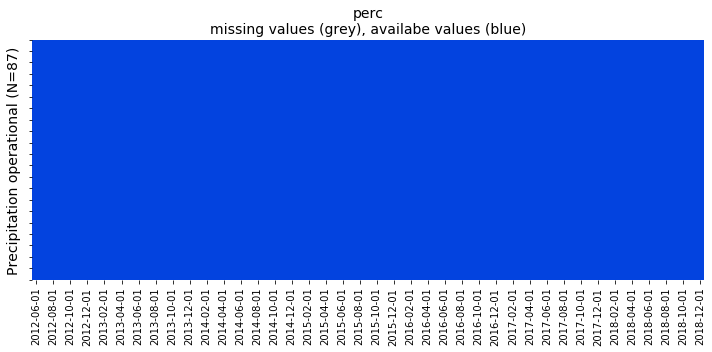

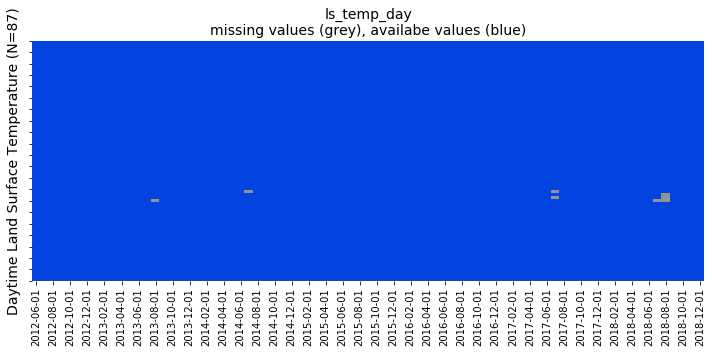

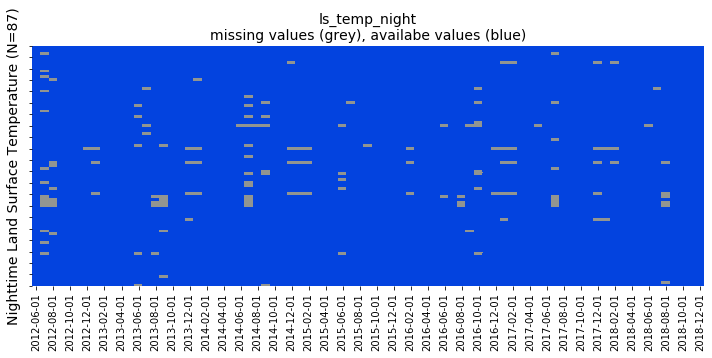

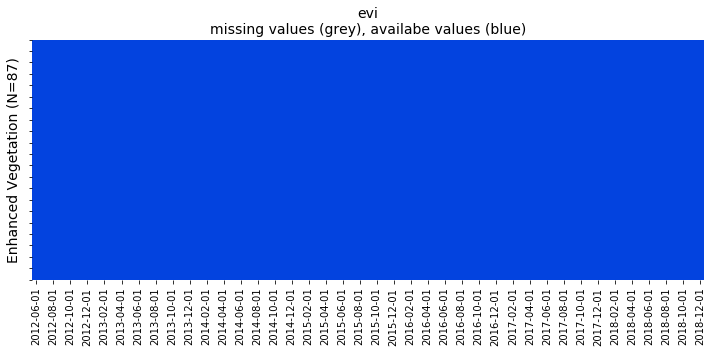

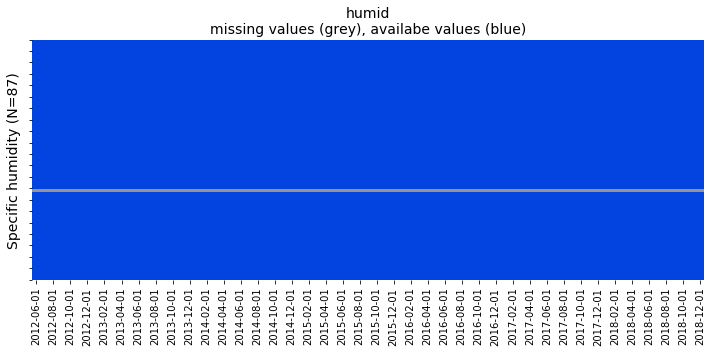

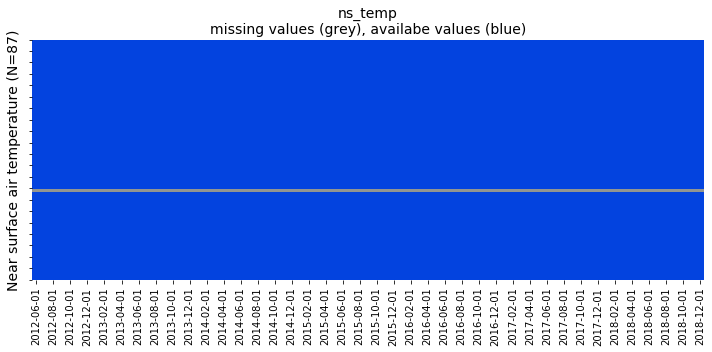

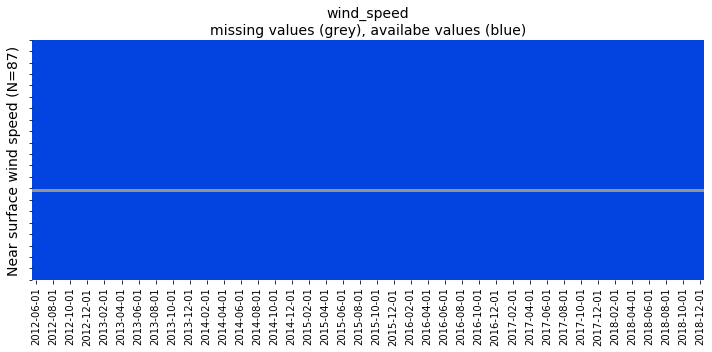

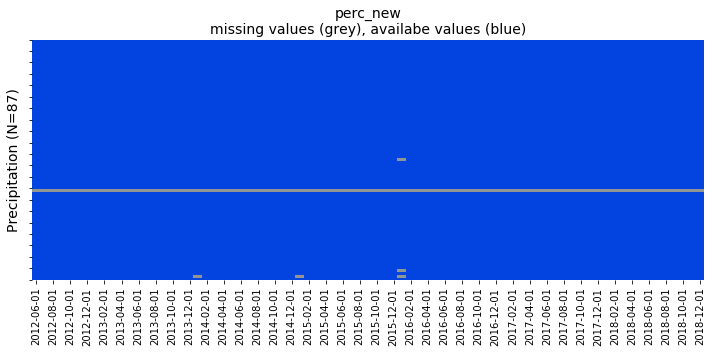

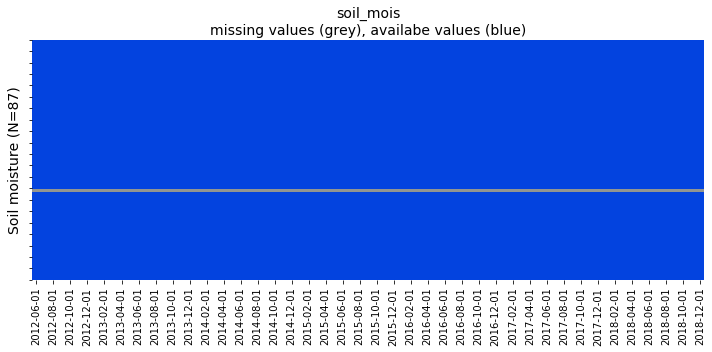

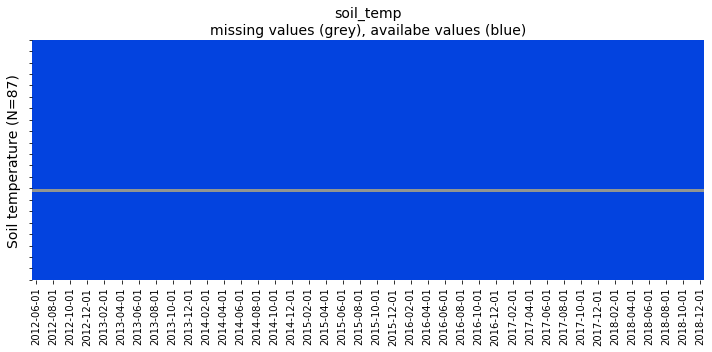

In [23]:
missing_values_graph(df, "adm_level", "date", "perc", "Precipitation operational")
#missing from 2012-01-01 until 2014-03-01; missing for "NCR, City of Manila, First District"
missing_values_graph(df, "adm_level", "date", "ls_temp_day", "Daytime Land Surface Temperature")
missing_values_graph(df, "adm_level", "date", "ls_temp_night", "Nighttime Land Surface Temperature")
missing_values_graph(df, "adm_level", "date", "evi", "Enhanced Vegetation")
missing_values_graph(df, "adm_level", "date", "humid", "Specific humidity")
#missing for "NCR, City of Manila, First District"; missing from 2019-11-01 
missing_values_graph(df, "adm_level", "date", "ns_temp", "Near surface air temperature")
#missing for "NCR, City of Manila, First District"; missing from 2019-11-01
missing_values_graph(df, "adm_level", "date", "wind_speed", "Near surface wind speed")
#missing for "NCR, City of Manila, First District"; missing from 2019-11-01

missing_values_graph(df, "adm_level", "date", "perc_new", "Precipitation")
missing_values_graph(df, "adm_level", "date", "soil_mois", "Soil moisture")
missing_values_graph(df, "adm_level", "date", "soil_temp", "Soil temperature")

In [15]:
#Add observation for 'NCR, City of Manila, First District'
#replicate data frame with new Hierarchical Indexes (adm primary)
df1 = df.set_index(['date', 'adm_level'])
df1 = df1.swaplevel(i='adm_level', j='date')
df1.sort_index(inplace = True)



#make a new data frame with Manila's neighbours and variables of interest (Hierarchical Indexes (date primary))
neighbours = ['NCR, Fourth District','NCR, Second District', 'NCR, Third District']
df2 = df1.loc[neighbours]
df2 = df2[['perc', 'humid', 'ns_temp', 'wind_speed', "perc_new", "soil_mois", "soil_temp"]]
df2 = df2.swaplevel(j='adm_level', i='date')

#create dictionaries with dates as keys and empty values
dates =  df.date.unique()
perc_Manila = dict.fromkeys(dates)
humid_Manila = dict.fromkeys(dates)
ns_temp_Manila = dict.fromkeys(dates)
wind_speed_Manila = dict.fromkeys(dates)

perc_new_Manila = dict.fromkeys(dates)
soil_mois_Manila = dict.fromkeys(dates)
soil_temp_Manila = dict.fromkeys(dates)

#check values in neighbouring provinces and take an average for a given date
for date in dates:
    perc_Manila[date] = df2.loc[date].perc.mean()
    humid_Manila[date] = df2.loc[date].humid.mean()
    ns_temp_Manila[date] = df2.loc[date].ns_temp.mean()
    wind_speed_Manila[date] = df2.loc[date].wind_speed.mean()
    
    perc_new_Manila[date] = df2.loc[date].perc_new.mean()
    soil_mois_Manila[date] = df2.loc[date].soil_mois.mean()
    soil_temp_Manila[date] = df2.loc[date].soil_temp.mean()
    
    
#uodate missing values for Manila
idx = pd.IndexSlice
df1.loc[idx['NCR, City of Manila, First District',:],"perc"] = np.fromiter(perc_Manila.values(), dtype=float)
df1.loc[idx['NCR, City of Manila, First District',:],"humid"] = np.fromiter(humid_Manila.values(), dtype=float)
df1.loc[idx['NCR, City of Manila, First District',:],"ns_temp"] = np.fromiter(ns_temp_Manila.values(), dtype=float)
df1.loc[idx['NCR, City of Manila, First District',:],"wind_speed"] = np.fromiter(wind_speed_Manila.values(), dtype=float)

df1.loc[idx['NCR, City of Manila, First District',:],"perc_new"] = np.fromiter(perc_new_Manila.values(), dtype=float)
df1.loc[idx['NCR, City of Manila, First District',:],"soil_mois"] = np.fromiter(soil_mois_Manila.values(), dtype=float)
df1.loc[idx['NCR, City of Manila, First District',:],"soil_temp"] = np.fromiter(soil_temp_Manila.values(), dtype=float)


df1.loc['NCR, City of Manila, First District'] #check values fot Manila
#substitute original df with df1, where values for Manila are modified
df1.reset_index(inplace=True)
df = df1
df[df.adm_level == 'NCR, City of Manila, First District']

adm_level        date      perc  ls_temp_day  \
4187  NCR, City of Manila, First District  2012-06-01  0.051230     40.22188   
4188  NCR, City of Manila, First District  2012-07-01  0.145415     38.55636   
4189  NCR, City of Manila, First District  2012-08-01  0.198829     37.52572   
4190  NCR, City of Manila, First District  2012-09-01  0.122491     31.72588   
4191  NCR, City of Manila, First District  2012-10-01  0.084405     34.52416   
...                                   ...         ...       ...          ...   
4261  NCR, City of Manila, First District  2018-08-01  0.106406     31.54714   
4262  NCR, City of Manila, First District  2018-09-01  0.100966     36.49416   
4263  NCR, City of Manila, First District  2018-10-01  0.035578     34.65354   
4264  NCR, City of Manila, First District  2018-11-01  0.009084     32.72062   
4265  NCR, City of Manila, First District  2018-12-01  0.061261     33.74500   

      ls_temp_night         evi     humid  perc_new  soil_mois   soil_temp  \
4187       26.74459  1117.57680  0.019112  0.000099   0.413331  302.206857   
4188            NaN   885.57214  0.018672  0.000286   0.421034  301.566783   
4189       24.63000   930.88250  0.019094  0.000369   0.417508  300.947783   
4190       24.16000   724.96040  0.018738  0.000241   0.419427  301.888550   
4191       24.18188   857.56160  0.017608  0.000111   0.409831  302.124967   
...             ...         ...       ...       ...        ...         ...   
4261            NaN   970.53810  0.019122  0.000189   0.418167  301.270167   
4262       23.53738  1185.37180  0.018616  0.000161   0.414738  302.120493   
4263       25.33166   881.72473  0.017550  0.000051   0.408511  303.086613   
4264       25.20396   893.63610  0.017390  0.000017   0.405425  302.189503   
4265       23.11791   741.46210  0.017246  0.000073   0.409623  300.992813   

        ns_temp  wind_speed  
4187  27.248803    5.277418  
4188  26.894837    4.047387  
4189  26.519607    6.406455  
4190  26.996260    3.006543  
4191  26.501053    4.342879  
...         ...         ...  
4261  26.775067    6.123143  
4262  27.006547    4.045807  
4263  27.106593    4.158386  
4264  26.536357    5.848422  
4265  25.993410    6.475347  

[79 rows x 12 columns]